# Векторные модели. Word2Vec

+ Firth (1957:11):
You shall know a word by the company it keeps...

+ Дистрибутивная гипотеза: значение слова определяется его контекстом — иначе говоря, словами, которые встречаются рядом с этим словом в тексте.

+ Область лингвистики, которая занимается вычислением степени семантической близости между словами/текстами и т.п. на основании их распределения (дистрибуции) в больших массивах данных (текстовых корпусах) назвается **дистрибутивной семантикой**.

## Кратко о существующих системах

**GloVe**

GloVe берет и строит полную матрицу совместной встречаемости и после этого с помощью алгоритомв уменьшения размерности преобразует ее так, чтобы вектора были опредленной длины


**Word2Vec**

Это уже нейросеть и она на основе корпуса постепенно подбирает коэффициенты (значения в векторах) для каждого слова так, чтобы с помощью них можно было наилучшим образом предсказывать слова по контексту

**FastText**

Если мы берем конкретные слова, мы не можем ничего сказать о тех, что нам не встретились (например, уже видели вагон и строитель, а вот вагоностроителя у нас не было). Если мы возьмем слова не целиком, а в виде буквенных нграмм, то мы сможем сложить неизвестные слова.

**AdaGram**

Все предыдущие модели основаны на графических оболочках и не учитывают многозначность и омонимию. Есть только один вектор для слова "ключ" и мы ничего с этим не можем сделать. AdaGram исходит из предположения, что у слова есть $n$ вариантов и если они действительно отличаются и достаточно часто встречаются, он умеет их разделить.

**BERT и ELMo**

Эти модели не просто могут отличить значения слов, о и скорректировать их вектора в зависимости от контекста, например, понять, что в отрывках “чистый ключ в лесной чаще” и “ключ от квартиры” совсем разные “ключи”. https://habr.com/ru/post/487358/

### Word2Vec

Одной из самых известных моделей для работы с дистрибутивной семантикой является word2vec. Технология основана на нейронной сети, предсказывающей вероятность встретить слово в заданном контексте. Этот инструмент был разработан группой исследователей Google в 2013 году, руководителем проекта был Томаш Миколов (сейчас работает в Facebook). Вот две самые главные статьи:

+ [Efficient Estimation of Word Representations inVector Space](https://arxiv.org/pdf/1301.3781.pdf)
+ [Distributed Representations of Words and Phrases and their Compositionality](https://arxiv.org/abs/1310.4546)

Полученные таким образом вектора называются распределенными представлениями слов, или **эмбеддингами**.

#### Как это обучается?

Мы задаём вектор для каждого слова с помощью матрицы $w$ и вектор контекста с помощью матрицы $W$. По сути, word2vec является обобщающим названием для двух архитектур Skip-Gram и Continuous Bag-Of-Words (CBOW).

+ **CBOW** предсказывает текущее слово, исходя из окружающего его контекста.

+ **Skip-gram**, наоборот, использует текущее слово, чтобы предугадывать окружающие его слова.
  

![cbow_skip-gram](https://raw.githubusercontent.com/hse-ling-python/seminars/master/vector_models/cbow_skip-gram.png)


#### Как это работает?

Word2vec принимает большой текстовый корпус в качестве входных данных и сопоставляет каждому слову вектор, выдавая координаты слов на выходе. Сначала он создает словарь, «обучаясь» на входных текстовых данных, а затем вычисляет векторное представление слов. Векторное представление основывается на контекстной близости: слова, встречающиеся в тексте рядом с одинаковыми словами (а следовательно, согласно дистрибутивной гипотезе, имеющие схожий смысл), в векторном представлении будут иметь близкие координаты векторов-слов. Для вычисления близости слов используется косинусное расстояние между их векторами.

С помощью дистрибутивных векторных моделей можно строить семантические пропорции (они же аналогии) и решать примеры:

+ король: мужчина = королева: женщина $\Rightarrow$
+ король - мужчина + женщина = королева

![w2v](https://camo.githubusercontent.com/b294a575c90c6463e76b647ec68dcde287b9d72714d067b5dc020b61254e9d8b/68747470733a2f2f63646e2d696d616765732d312e6d656469756d2e636f6d2f6d61782f323630302f312a73584e5859664171664c556569445850436f313330772e706e67)

Ещё про механику с картинками [тут](https://habr.com/ru/post/446530/)

#### Зачем это нужно?

+ используется для решения семантических задач
+ подаётся на вход нейронным сетям
+ используется в Siri, Google Assistant, Alexa, Google Translate...

**Давайте подумаем, для описания каких семантических классов слов дистрибутивная информация особенно важна?**

Несколько интересных статей по дистрибутивной семантике:

* [Turney and Pantel 2010](https://jair.org/index.php/jair/article/view/10640)
* [Lenci 2018](https://www.annualreviews.org/doi/abs/10.1146/annurev-linguistics-030514-125254?journalCode=linguistics)
* [Smith 2019](https://arxiv.org/pdf/1902.06006.pdf)
* [Pennington et al. 2014](https://www.aclweb.org/anthology/D14-1162/)
* [Faruqui et al. 2015](https://www.aclweb.org/anthology/N15-1184/)

#### Gensim

Использовать предобученную модель эмбеддингов или обучить свою можно с помощью библиотеки `gensim`. Вот ее [документация](https://radimrehurek.com/gensim/models/word2vec.html). Вообще-то `gensim` — библиотека для тематического моделирования текстов, но один из компонентов в ней — реализация на python алгоритмов из библиотеки word2vec (которая в оригинале была написана на C++).

Если gensim у вас не стоит, то ставим: `!pip install gensim`.


In [ ]:
import gensim
import logging
import urllib.request

import warnings
warnings.filterwarnings('ignore')

#### Как обучить свою модель

NB! Обратите внимание, что тренировка модели не включает препроцессинг! Это значит, что избавляться от пунктуации, приводить слова к нижнему регистру, лемматизировать их, проставлять частеречные теги придется до тренировки модели (если, конечно, это необходимо для вашей задачи). Т.е. в каком виде слова будут в исходном тексте, в таком они будут и в модели.

Поскольку иногда тренировка модели занимает много времени, то можно ещё вести лог событий, чтобы понимать, что на каком этапе происходит.

In [ ]:
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

На вход модели даем текстовый файл, каждое предложение на отдельной строчке. Вот игрушечный пример с текстом «Бедной Лизы». Он заранее очищен от пунктуации, приведен к нижнему регистру и лемматизирован.

In [ ]:
!wget https://raw.githubusercontent.com/hse-ling-python/seminars/refs/heads/master/vector_models/liza_lem.txt

In [ ]:
f = 'liza_lem.txt'
data = gensim.models.word2vec.LineSentence(f)

Инициализируем модель. Основные параметры:

+ данные должны быть итерируемым объектом
+ size — размер вектора,
+ window — размер окна наблюдения,
+ min_count — мин. частотность слова в корпусе,
+ sg — используемый алгоритм обучения (0 — CBOW, 1 — Skip-gram),
+ sample — порог для downsampling'a высокочастотных слов,
+ workers — количество потоков,
+ alpha — learning rate,
+ iter — количество итераций,
+ max_vocab_size — позволяет выставить ограничение по памяти при создании словаря (т.е. если ограничение привышается, то низкочастотные слова будут выбрасываться). Для сравнения: 10 млн слов = 1Гб RAM.

In [ ]:
%time model_liza = gensim.models.Word2Vec(data, vector_size=300, window=5, min_count=2)

CPU times: user 71 ms, sys: 4.08 ms, total: 75 ms
Wall time: 131 ms


Можно нормализовать вектора, тогда модель будет занимать меньше RAM. Однако после этого её нельзя дотренировывать. Здесь используется L2-нормализация: вектора нормализуются так, что если сложить квадраты всех элементов вектора, в сумме получится 1.

In [ ]:
model.init_sims(replace=True)

In [ ]:
model_path = "liza.bin"

print("Saving model...")
model_liza.wv.save_word2vec_format(model_path, binary=True)

Saving model...


Смотрим, сколько в модели слов:

In [ ]:
print(len(model_liza.wv.key_to_index))

478


In [ ]:
print(sorted([w for w in model_liza.wv.key_to_index]))

['анюта', 'армия', 'ах', 'барин', 'бедный', 'белый', 'берег', 'березовый', 'беречь', 'бесчисленный', 'благодарить', 'бледный', 'блеснуть', 'блестящий', 'близ', 'бог', 'богатый', 'большой', 'бояться', 'брать', 'бросать', 'бросаться', 'бывать', 'быть', 'важный', 'ввечеру', 'вдова', 'велеть', 'великий', 'великолепный', 'верить', 'верно', 'весело', 'веселый', 'весна', 'вести', 'весь', 'весьма', 'ветвь', 'ветер', 'вечер', 'взглядывать', 'вздох', 'вздыхать', 'взор', 'взять', 'вид', 'видеть', 'видеться', 'видный', 'вместе', 'вода', 'возвращаться', 'воздух', 'война', 'воображать', 'воображение', 'воспоминание', 'восторг', 'восхищаться', 'время', 'все', 'вслед', 'вставать', 'встречаться', 'всякий', 'высокий', 'выть', 'выходить', 'глаз', 'глубокий', 'гнать', 'говорить', 'год', 'голос', 'гора', 'горе', 'горестный', 'горлица', 'город', 'горький', 'господь', 'гром', 'грусть', 'давать', 'давно', 'далее', 'дверь', 'движение', 'двор', 'девушка', 'дело', 'день', 'деньги', 'деревня', 'деревянный', 'деся

И чему же мы ее научили? Попробуем оценить модель вручную, порешав примеры. Несколько дано ниже, попробуйте придумать свои.

In [ ]:
model_liza.wv.most_similar(positive=["смерть", "любовь"], negative=["печальный"], topn=1)

[('проходить', 0.18653517961502075)]

In [ ]:
model_liza.wv.most_similar("любовь", topn=3)

[('выть', 0.2030768096446991),
 ('нежный', 0.18605183064937592),
 ('лодка', 0.1758255809545517)]

In [ ]:
model_liza.wv.similarity("лиза", "эраст")

0.14449573

In [ ]:
model_liza.wv.doesnt_match("скорбь грусть слеза улыбка".split())

'слеза'

In [ ]:
model_liza.wv.words_closer_than("лиза", "эраст")

['свой',
 'который',
 'мочь',
 'сей',
 'мой',
 'ты',
 'часто',
 'слеза',
 'жить',
 'цветок',
 'смотреть',
 'прощаться',
 'прекрасный',
 'девушка',
 'час',
 'дуб',
 'поле',
 'дело',
 'поцеловать',
 'деревня',
 'довольно',
 'страшно',
 'какой',
 'карман',
 'побледнеть',
 'забава',
 'схватывать']

#### Параметры варьирования

1) препроцессинг $-$ лемматизировать или нет, например, вдруг мы хотим посмотреть на морфологические пропорции? тогда лемматизировать не нужно

2) размер корпуса $-$ чем больше, тем лучше, но! не для семантических задач $-$ для них важнее качество

3) размер словаря

4) negative samples

5) количество итераций

6) длина вектора $-$ 100-300 (судя по всему, >300 не сильно улучшает результаты)

7) длина окна $-$ для синтаксических задач, примерно 4, для семантических задач, большое окно, 8, 10.

Хорошая статья про сравнение моделей с варьированием параметров: https://www.aclweb.org/anthology/D14-1162.pdf

#### Как использовать готовую модель

#### RusVectōrēs

На сайте RusVectōrēs (https://rusvectores.org/ru/) собраны предобученные на различных данных модели для русского языка, а также можно поискать наиболее близкие слова к заданному, посчитать семантическую близость нескольких слов и порешать примеры с помощью «калькулятором семантической близости».

Для других языков также можно найти предобученные модели — например, модели [fastText](https://fasttext.cc/docs/en/english-vectors.html) и [GloVe](https://nlp.stanford.edu/projects/glove/)

Ещё давайте посмотрим на **векторные романы** https://nevmenandr.github.io/novel2vec/

#### Работа с моделью

Модели word2vec бывают разных форматов:

+ .vec.gz — обычный файл
+ .bin.gz — бинарник

Загружаются они с помощью одного и того же класса `KeyedVectors`, меняется только параметр `binary` у функции `load_word2vec_format`.

Если же эмбеддинги обучены не с помощью word2vec, то для загрузки нужно использовать функцию `load`. Т.е. для загрузки предобученных эмбеддингов `glove`, `fasttext`, `bpe` и любых других нужна именно она.

Скачаем с RusVectōrēs модель для русского языка, обученную на НКРЯ образца 2015 г.

In [ ]:
urllib.request.urlretrieve('http://vectors.nlpl.eu/repository/20/180.zip', 'ruscorpora_upos_cbow_300_20_2019.zip')

('ruscorpora_upos_cbow_300_20_2019.zip',
 <http.client.HTTPMessage at 0x7cdb9b150760>)

In [ ]:
import zipfile

src = 'ruscorpora_upos_cbow_300_20_2019.zip'

with zipfile.ZipFile(src, 'r') as zip_ref:
    zip_ref.extractall('.')

In [ ]:
m = 'model.bin'
model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)

In [ ]:
# Более общий пример чтения для разных форматов

# if m.endswith('.vec.gz'):
#     model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=False)
# elif m.endswith('.bin.gz'):
#     model = gensim.models.KeyedVectors.load_word2vec_format(m, binary=True)
# else:
#     model = gensim.models.KeyedVectors.load(m)

**Мини-исследование**: Давайте протестируем, выделяет ли модель функцию интенсификации в прилагательных? Например, *ужасный курильщик* может интерпретироваться как *человек, который много курит*, а не только как (не столько как) *очень плохой человек-курильщик*. Объединяет ли модель *плохой, ужасный, жуткий, страшный* по отрицательной полярности и объединяет ли она *ужасный, жуткий, страшный* по функции интенсификации?

In [ ]:
words = ['хороший_ADJ', 'плохой_ADJ', 'ужасный_ADJ', 'жуткий_ADJ',
         'страшный_ADJ', 'красный_ADJ', 'синий_ADJ']

Частеречные тэги нужны, поскольку это специфика скачанной модели $-$ она была натренирована на словах, аннотированных их частями речи (и лемматизированных).<br> NB! В названиях моделей на `rusvectores` указано, какой тегсет они используют (mystem, upos и т.д.)

Попросим у модели 10 ближайших соседей для каждого слова и коэффициент косинусной близости для каждого:


In [ ]:
for word in words:
    # есть ли слово в модели?
    if word in model:
        print(word)
        # смотрим на вектор слова (его размерность 300, смотрим на первые 10 чисел)
        print(model[word][:10])
        # выдаем 10 ближайших соседей слова:
        for i in model.most_similar(positive=[word], topn=10):
            # слово + коэффициент косинусной близости
            print(i[0], i[1])
        print('\n')
    else:
        # Увы!
        print('Увы, слова "%s" нет в модели!' % word)

хороший_ADJ
[ 0.39063922 -0.59286386  0.2904544  -0.50303257 -2.5178728  -0.32921696
 -0.11378101  2.3540142  -0.7469507   0.575873  ]
плохой_ADJ 0.7199259400367737
хорошо_ADJ 0.7194940447807312
хороший_ADV 0.7017659544944763
отличный_ADJ 0.5889108777046204
неплохой_ADJ 0.5688834190368652
хорошо_ADV 0.5612869262695312
плохой_ADV 0.550938069820404
дурной_ADJ 0.547274112701416
плохо_ADJ 0.5336433053016663
порядочный_ADJ 0.5249404907226562


плохой_ADJ
[ 1.4803387  -1.2092538  -0.63644236 -0.86948526 -2.609649   -1.4877269
  1.820501    1.1135094  -1.7207917   2.1094906 ]
плохой_ADV 0.7636498212814331
плохо_ADJ 0.7618687748908997
хороший_ADJ 0.7199259400367737
плохой_NOUN 0.6278461217880249
плохо_ADV 0.6075649857521057
дурной_ADJ 0.5957777500152588
скверный_ADJ 0.5612467527389526
хороший_ADV 0.5596944093704224
хорошо_ADJ 0.5326194763183594
нехороший_ADJ 0.5315104722976685


ужасный_ADJ
[ 1.2331225   0.5272287  -1.1946528  -1.6149291   0.9953003   0.99591553
  1.278049   -0.33159655 -0.949

Находим косинусную близость пары слов:

In [ ]:
print(model.similarity('плохой_ADJ', 'хороший_ADJ'))

0.71992594


In [ ]:
print(model.similarity('плохой_ADJ', 'синий_ADJ'))

-0.19825833


In [ ]:
print(model.similarity('ужасный_ADJ', 'жуткий_ADJ'))

0.5145892


Попробуем составить пропорцию:

+ positive — вектора, которые мы складываем
+ negative — вектора, которые вычитаем

In [ ]:
print(model.most_similar(positive=['плохой_ADJ', 'ужасный_ADJ'], negative=['хороший_ADJ'])[0][0])

страшный_ADJ


Найди лишнее!

In [ ]:
print(model.doesnt_match('плохой_ADJ хороший_ADJ ужасный_ADJ страшный_ADJ'.split()))

хороший_ADJ


In [ ]:
print(model.doesnt_match('плохой_ADJ ужасный_ADJ страшный_ADJ'.split()))

плохой_ADJ


In [ ]:
for word, score in model.most_similar(positive=['ужасно_ADV'], negative=['плохой_ADJ']):
    print(f'{score:.4}\t{word}')

0.5744	страшно_ADV
0.4596	несказанно_ADV
0.4414	необыкновенно_ADV
0.4414	безумно_ADV
0.3979	донельзя_ADV
0.3932	неимоверно_ADV
0.3869	нестерпимо_ADV
0.3728	невыразимо_ADV
0.3697	ужасный_ADV
0.3641	юлия::михайловна_PROPN


Что означают полученные результаты для нашего исследования? Объединяет ли модель *плохой, ужасный, жуткий, страшный* по отрицательной полярности и объединяет ли она *ужасный, жуткий, страшный* по функции интенсификации?

### Визуализация

Можно использовать разные методы того, как преобразовать векторы так, чтобы можно было их поместить на двумерное пространство, например, с помощью PCA. В зависимости от того, относительно какого набора слов вы пытаетесь найти оптимально отображение на двумерное пространство, у вас могут получаться разные результаты

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
words = ['хороший_ADJ', 'плохой_ADJ', 'ужасный_ADJ','жуткий_ADJ',
         'страшный_ADJ', 'красный_ADJ', 'синий_ADJ']
X = model[words]

In [ ]:
pca = PCA(n_components=2)
coords = pca.fit_transform(X)

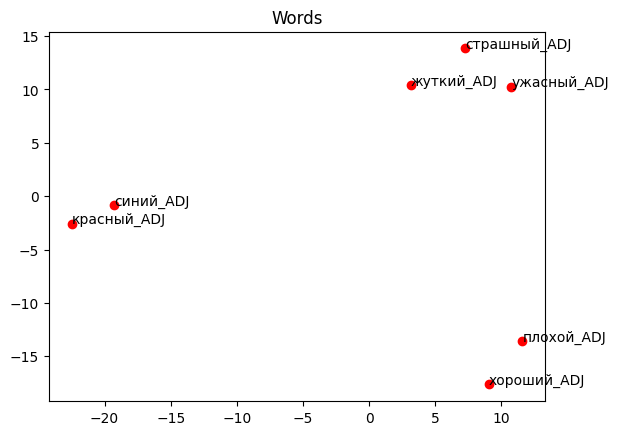

In [ ]:
plt.scatter(coords[:, 0], coords[:, 1], color='red')
plt.title('Words')

for i, word in enumerate(words):
    plt.annotate(word, xy=(coords[i, 0], coords[i, 1]))
plt.show()

#### Оценка

Это, конечно, хорошо, но как понять, какая модель лучше? Или вот, например, я сделал свою модель, а как понять, насколько она хорошая?

Для этого существуют специальные датасеты для оценки качества дистрибутивных моделей. Основных два: один измеряет точность решения задач на аналогии, а второй используется для оценки коэффициента семантической близости.

#### Word Similarity

Этот метод заключается в том, чтобы оценить, насколько представления о семантической близости слов в модели соотносятся с "представлениями" людей.

| слово 1    | слово 2    | близость |
|------------|------------|----------|
| кошка      | собака     | 0.7      |
| чашка      | кружка     | 0.9      |

Для каждой пары слов из заранее заданного датасета мы можем посчитать косинусное расстояние, и получить список таких значений близости. При этом у нас уже есть список значений близостей, сделанный людьми. Мы можем сравнить эти два списка и понять, насколько они похожи (например, посчитав корреляцию). Эта мера схожести должна говорить о том, насколько модель хорошо моделирует расстояния о слова.

#### Аналогии

Другая популярная задача для "внутренней" оценки называется задачей поиска аналогий. Как мы уже разбирали выше, с помощью простых арифметических операций мы можем модифицировать значение слова. Если заранее собрать набор слов-модификаторов, а также слов, которые мы хотим получить в результаты модификации, то на основе подсчёта количества "попаданий" в желаемое слово мы можем оценить, насколько хорошо работает модель.

В качестве слов-модификатор мы можем использовать семантические аналогии. Скажем, если у нас есть некоторое отношение "страна-столица", то для оценки модели мы можем использовать пары наподобие "Россия-Москва", "Норвегия-Осло", и т.д. Датасет будет выглядеть следующм образом:

| слово 1    | слово 2    | отношение     |
|------------|------------|---------------|
| Россия     | Москва     | страна-столица|
| Норвегия   | Осло       | страна-столица|

Рассматривая случайные две пары из этого набора, мы хотим, имея триплет (Россия, Москва, Норвегия) хотим получить слово "Осло", т.е. найти такое слово, которое будет находиться в том же отношении со словом "Норвегия", как "Россия" находится с Москвой.

Датасеты для русского языка можно скачать на странице с моделями на RusVectores. Посчитаем качество нашей модели НКРЯ на датасете про аналогии:

In [ ]:
!wget https://raw.githubusercontent.com/hse-ling-python/seminars/refs/heads/master/vector_models/ru_analogy_tagged_PROPN.txt

Ячейка ниже очень долго (минут 5) считается, так что ее лучше перезапускать, если будет много свободного времени

In [ ]:
score, sections = model.evaluate_word_analogies('ru_analogy_tagged_PROPN.txt')

In [ ]:
score

0.45288800367703386

In [ ]:
for section in sections:
    print(section["section"])
    for item in section["incorrect"][:5]:
        print(item)
    print('*' * 10)

capital-common-countries
('АФИНЫ_PROPN', 'ГРЕЦИЯ_PROPN', 'БАГДАД_PROPN', 'ИРАК_PROPN')
('АФИНЫ_PROPN', 'ГРЕЦИЯ_PROPN', 'БАНГКОК_PROPN', 'ТАИЛАНД_PROPN')
('АФИНЫ_PROPN', 'ГРЕЦИЯ_PROPN', 'ХАНОЙ_PROPN', 'ВЬЕТНАМ_PROPN')
('АФИНЫ_PROPN', 'ГРЕЦИЯ_PROPN', 'МОСКВА_PROPN', 'РОССИЯ_PROPN')
('АФИНЫ_PROPN', 'ГРЕЦИЯ_PROPN', 'ТЕГЕРАН_PROPN', 'ИРАН_PROPN')
**********
capital-world
('АЛЖИР_PROPN', 'АЛЖИР_PROPN', 'АНКАРА_PROPN', 'ТУРЦИЯ_PROPN')
('АЛЖИР_PROPN', 'АЛЖИР_PROPN', 'АШХАБАД_PROPN', 'ТУРКМЕНИСТАН_PROPN')
('АЛЖИР_PROPN', 'АЛЖИР_PROPN', 'АСТАНА_PROPN', 'КАЗАХСТАН_PROPN')
('АЛЖИР_PROPN', 'АЛЖИР_PROPN', 'АФИНЫ_PROPN', 'ГРЕЦИЯ_PROPN')
('АЛЖИР_PROPN', 'АЛЖИР_PROPN', 'БАГДАД_PROPN', 'ИРАК_PROPN')
**********
currency
('АЛЖИР_PROPN', 'ДИНАР_NOUN', 'АРГЕНТИНА_PROPN', 'ПЕСО_NOUN')
('АЛЖИР_PROPN', 'ДИНАР_NOUN', 'БРАЗИЛИЯ_PROPN', 'РЕАЛ_NOUN')
('АЛЖИР_PROPN', 'ДИНАР_NOUN', 'БОЛГАРИЯ_PROPN', 'ЛЕВ_NOUN')
('АЛЖИР_PROPN', 'ДИНАР_NOUN', 'ДАНИЯ_PROPN', 'КРОНА_NOUN')
('АЛЖИР_PROPN', 'ДИНАР_NOUN', 'ЕВРОПА_PROPN', '

#### Задание 1

+ Возьмите небольшой кусочек текста или стихотворение.
+ Замените все неслужебные слова в нём на их ближайших соседей из нашей модели.
+ Прокомментируйте результат.

#### Задание 2

+ Возьмите интересный Вам текст.
+ Лемматизируйте текст, отчистите от пунктуации и служебной информации и обучите на нем модель word2vec (поэкспериментируйте с размером окна, с длиной вектора).
+ Найдите по 5 ближайших слов к нескольким интересующим Вас словам. Обязательно попробуйте взять слова различной частеречной принадлежности, различных семантических классов (абстрактные слова, экспрессивы). Учтите, что слова может не быть в модели!
+ Найдите по 5 "далёких" слов к нескольким интересующим Вас словам. Обязательно попробуйте взять слова различной частеречной принадлежности, различных семантических классов (абстрактные слова, экспрессивы).
+ Прокомментируйте результат.